In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print a confirmation message indicating that libraries were successfully imported
print('"Libraries successfully imported"')

"Libraries successfully imported"


In [2]:
df = pd.read_csv(r'C:/Users/Aleena Omair/Desktop/survey.csv')
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  8/27/2014 11:29   37  Female   United States    IL           NaN   
1  8/27/2014 11:29   44       M   United States    IN           NaN   
2  8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often          25-Jun  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely          25-Jun  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

# Data Description

In [3]:
df.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.shape

(1259, 27)

In [6]:
# Check which columns have missing data and find the number of unique features for each column

# Concatenate the information about missing data, number of unique features, and data types
frame = pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis=1, sort=False)

# Display the resulting DataFrame
frame

0    1       2
Timestamp                     0  884  object
Age                           0   53   int64
Gender                        0   49  object
Country                       0   48  object
state                       515   45  object
self_employed                18    2  object
family_history                0    2  object
treatment                     0    2  object
work_interfere              264    4  object
no_employees                  0    6  object
remote_work                   0    2  object
tech_company                  0    2  object
benefits                      0    3  object
care_options                  0    3  object
wellness_program              0    3  object
seek_help                     0    3  object
anonymity                     0    3  object
leave                         0    5  object
mental_health_consequence     0    3  object
phys_health_consequence       0    3  object
coworkers                     0    3  object
supervisor                    0    3  object
mental_health_interview       0    3  object
phys_health_interview         0    3  object
mental_vs_physical            0    3  object
obs_consequence               0    2  object
comments                   1095  160  object

In [7]:
if df.isnull().sum().sum() == 0:
    print('There is no missing data in our dataset.')
else:
    # Print the total number of missing data in the dataset
    print('There is {} missing data in our dataset.'.format(df.isnull().sum().sum()))

There is 1892 missing data in our dataset.


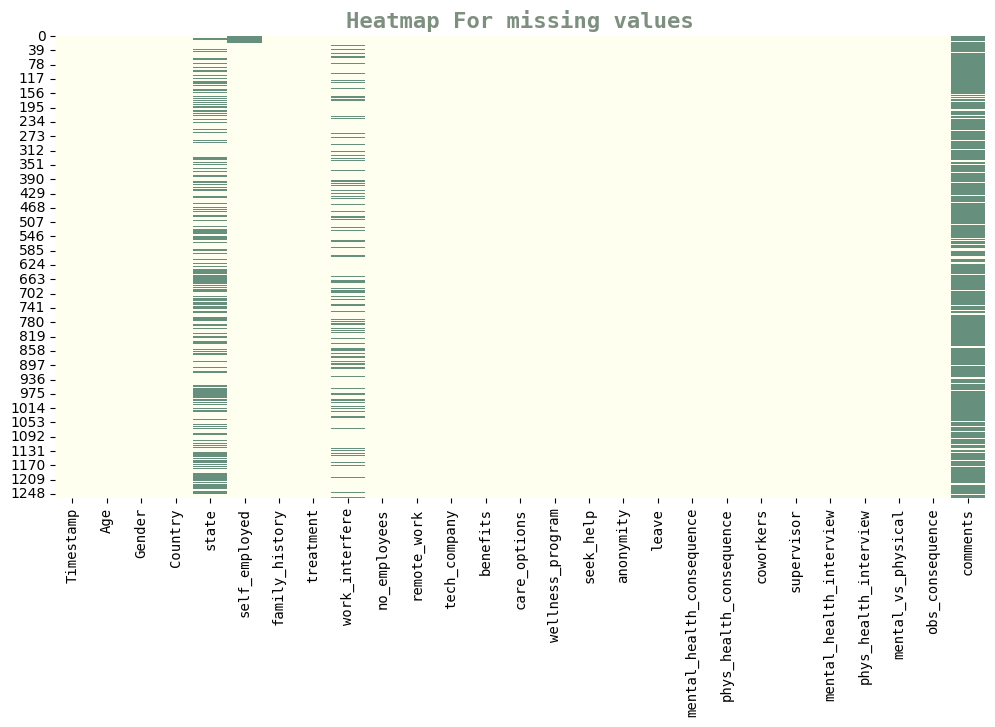

In [8]:
#heat map for Missing Values
#Defining Size 
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(df.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}

#setting Title
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)

#Show the Plot
plt.show()

In [9]:
# Drop columns that are irrelevant for the analysis or contain too much missing data

# List of columns to be dropped
columns_to_drop = ['state', 'comments', 'Timestamp']

# Iterate through each column in the list
for column in columns_to_drop:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        # Drop the specified column
        df = df.drop(columns=[column])

# Display the DataFrame after dropping columns
df.head()

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often          25-Jun          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely          25-Jun          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

In [10]:
#Look at what is in the 'Work_interfere' column to choose a suitable method to fill nan values.
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [11]:
df['work_interfere'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['work_interfere'].values.reshape(-1, 1)))

# Replace missing data in the 'self_employed' column with its modal value
df['self_employed'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['self_employed'].values.reshape(-1, 1)))

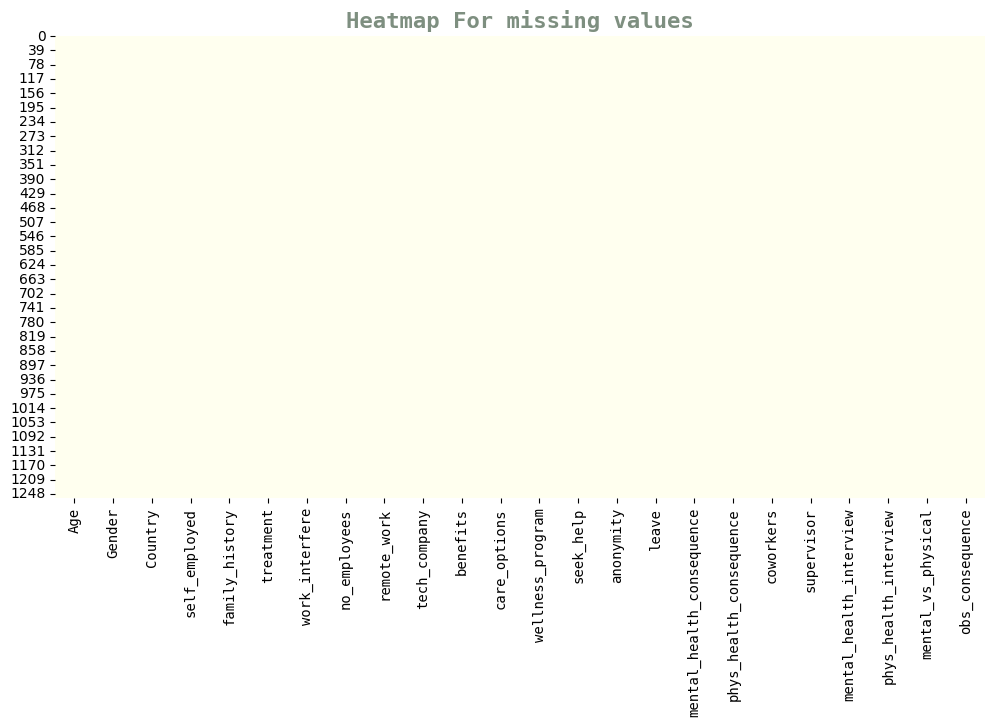

In [12]:
#heat map for Missing Values
#Defining Size 
plt.figure(figsize=(12,6) , dpi=100)
sns.heatmap(df.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'monospace'}

#setting Title
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452b',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)

#Show the Plot
plt.show()

# Step 02. Feature Engineering

In [13]:
# Check the unique values in the 'Gender' column

# Print the unique values in the 'Gender' column
print("Unique values in 'Gender' column:", df['Gender'].unique())

# Print an empty line and a separator for better readability
print('\n' + '-' * 92 + '\n')

# Check the number of unique values in the 'Gender' column

# Print the number of unique values in the 'Gender' column
print('Number of unique values in the "Gender" column:', df['Gender'].nunique())

Unique values in 'Gender' column: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

--------------------------------------------------------------------------------------------

Number of unique values in the "Gender" column: 49


In [14]:
# Cleaning up the 'Gender' column to make it more uniform

# Replace various gender values with standardized categories ('Male', 'Female', 'Other')
df['Gender'].replace( 
    ['Male ', 'male', 'M', 'm', 'Male', 'Cis Male', 'Man', 'cis male', 'Mail',
     'Male-ish', 'Male (CIS)', 'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'],
    'Male', inplace=True
)

df['Gender'].replace(
    ['Female ', 'female', 'F', 'f', 'Woman', 'Female', 'femail', 'Cis Female',
     'cis-female/femme', 'Femake', 'Female (cis)', 'woman'],
    'Female', inplace=True
)

df["Gender"].replace(
    ['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne',
     'Trans-female', 'male leaning androgynous', 'Agender', 'A little about you', 'Nah',
     'All', 'ostensibly male, unsure what that really means', 'Genderqueer', 'Enby', 'p',
     'Neuter', 'something kinda male?', 'Guy (-ish) ^_^', 'Trans woman'],
    'Other', inplace=True
)

# Print unique values in the 'Gender' column after cleaning
print("Unique values in 'Gender' column after cleaning:", df['Gender'].unique())

# Print unique values in the 'no_employees' column
print("Unique values in 'no_employees' column:", df['no_employees'].unique())

Unique values in 'Gender' column after cleaning: ['Female' 'Male' 'Other']
Unique values in 'no_employees' column: ['25-Jun' 'More than 1000' '26-100' '100-500' '5-Jan' '500-1000']


# Step 03. Data Filtering:

In [15]:
#Checking for Different Age Groups

print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")


The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 



In [16]:
#Removing Negative Age Values

df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

# Step 04. Exploratory Data Analysis

In [17]:
gender_family_history_count = df.groupby('Gender')['family_history'].value_counts().unstack(fill_value=0)

# Print the result
print(gender_family_history_count)

family_history   No  Yes
Gender                  
Female          115  132
Male            640  348
Other             9   10


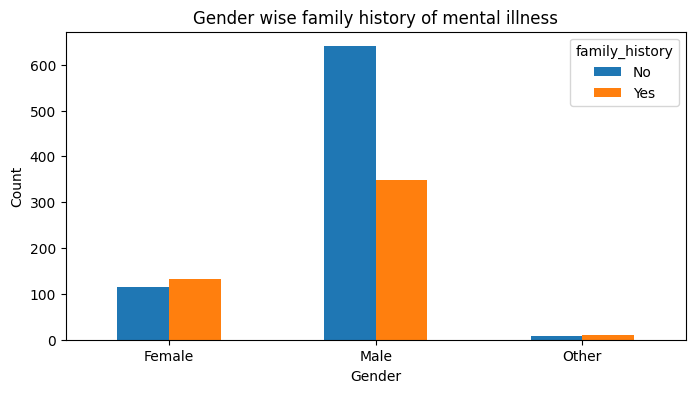

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'Gender' and count the occurrences of each value in 'family_history'
gender_family_history_count = df.groupby(['Gender', 'family_history']).size().unstack(fill_value=2)

# Plot the data as a grouped bar chart
gender_family_history_count.plot(kind='bar', figsize=(8, 4))
plt.title('Gender wise family history of mental illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the grouped bar chart
plt.show()


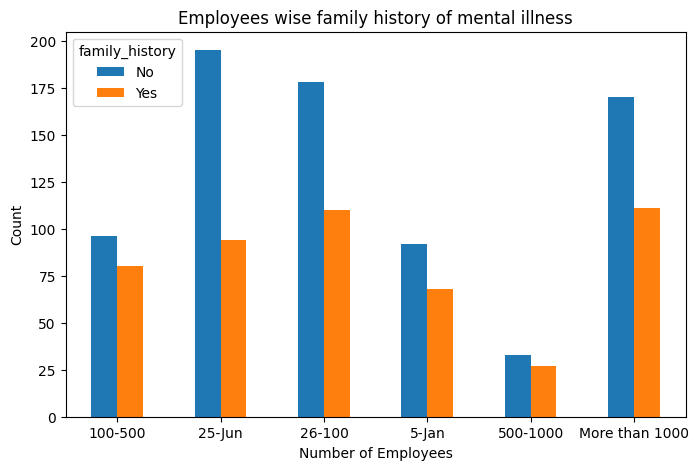

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'Gender' and count the occurrences of each value in 'family_history'
gender_family_history_count = df.groupby(['no_employees', 'family_history']).size().unstack(fill_value=5)

# Plot the data as a grouped bar chart
gender_family_history_count.plot(kind='bar', figsize=(8, 5))
plt.title('Employees wise family history of mental illness')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the grouped bar chart
plt.show()


<Figure size 1000x600 with 0 Axes>

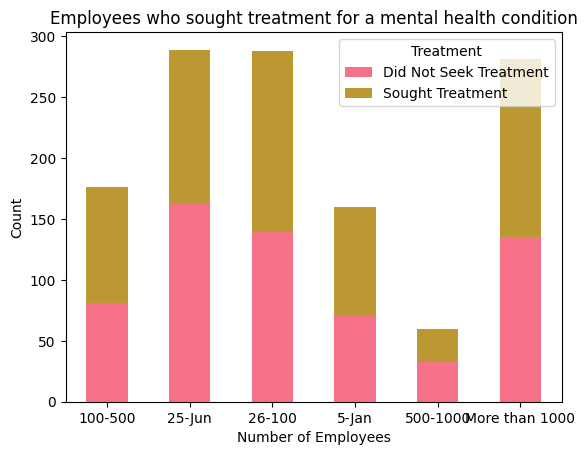

In [20]:
# Group by 'no_employees' and 'treatment' and count the occurrences of each value
gender_family_history_count = df.groupby(['no_employees', 'treatment']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("husl")  # Use a colorful palette
gender_family_history_count.plot(kind='bar', stacked=True)
plt.title('Employees who sought treatment for a mental health condition')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the stacked bar chart
plt.legend(title='Treatment', labels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.show()

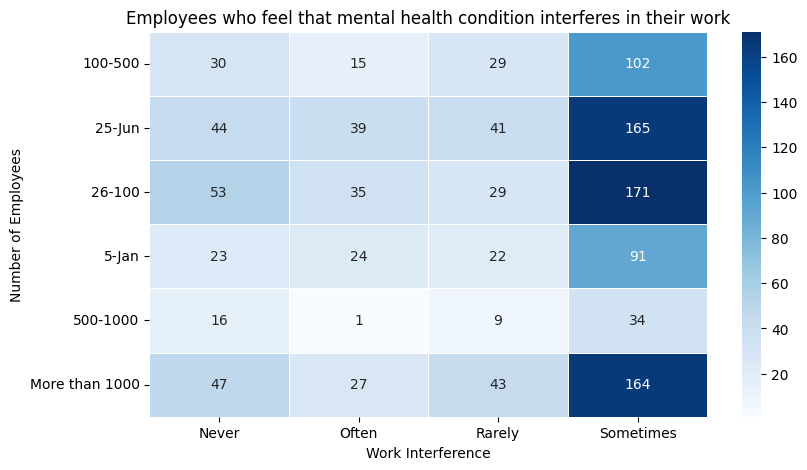

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Group by 'no_employees' and 'work_interfere' and count the occurrences of each value
gender_family_history_count = df.groupby(['no_employees', 'work_interfere']).size().unstack(fill_value=0)

# Create a heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(gender_family_history_count, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Employees who feel that mental health condition interferes in their work')
plt.xlabel('Work Interference')
plt.ylabel('Number of Employees')

# Show the heatmap
plt.show()


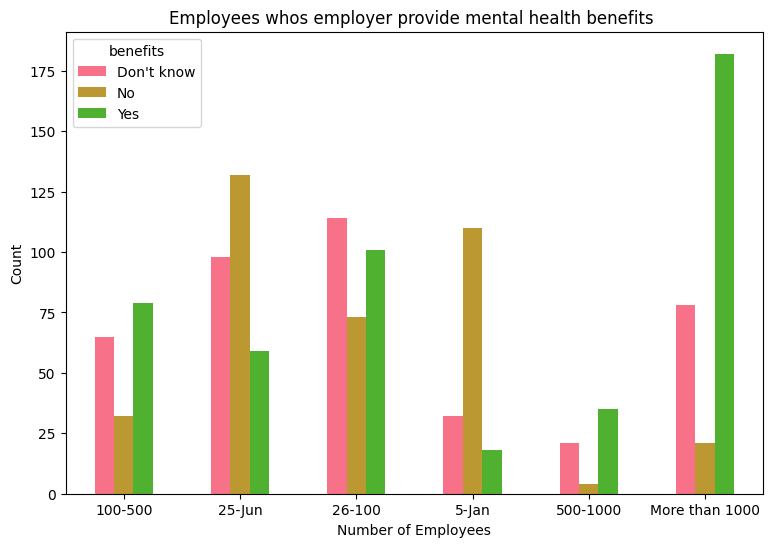

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Group by 'Gender' and count the occurrences of each value in 'family_history'
gender_family_history_count = df.groupby(['no_employees', 'benefits']).size().unstack(fill_value=0)

# Plot the data as a grouped bar chart
gender_family_history_count.plot(kind='bar', figsize=(9, 6))
plt.title('Employees whos employer provide mental health benefits ')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the grouped bar chart
plt.show()


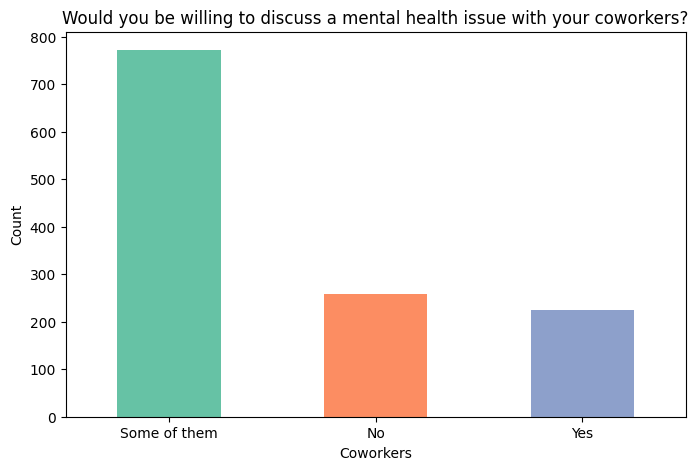

In [23]:
coworkers_counts = df['coworkers'].value_counts()

# Define a color palette with distinct colors
colors = sns.color_palette("Set2", len(coworkers_counts))

# Plot the data as a bar chart with custom colors
coworkers_counts.plot(kind='bar', figsize=(8, 5), color=colors)
plt.title('Would you be willing to discuss a mental health issue with your coworkers?')
plt.xlabel('Coworkers')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the bar chart
plt.show()

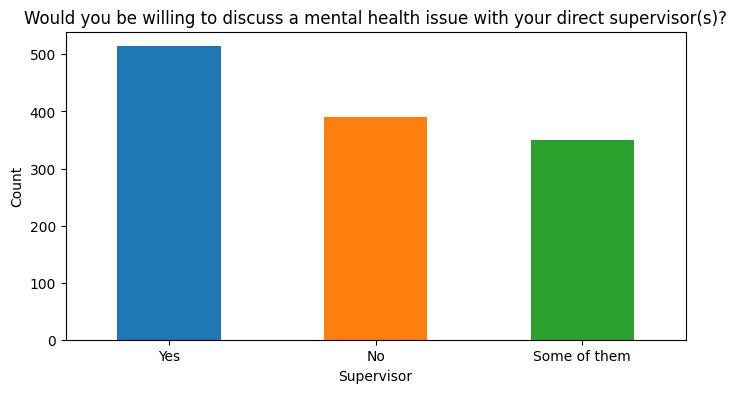

In [24]:
supervisor_counts = df['supervisor'].value_counts()

# Define a custom color palette with distinct and darker colors
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Plot the data as a bar chart with custom colors
supervisor_counts.plot(kind='bar', figsize=(8, 4), color=custom_colors)
plt.title('Would you be willing to discuss a mental health issue with your direct supervisor(s)?')
plt.xlabel('Supervisor')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the bar chart
plt.show()

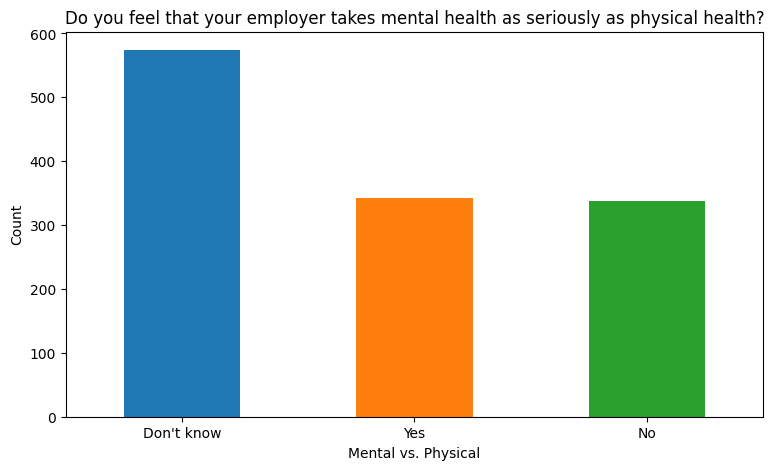

In [25]:
mental_vs_physical_counts = df['mental_vs_physical'].value_counts()

# Define a custom color palette with distinct and darker colors
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Plot the data as a bar chart with custom colors
mental_vs_physical_counts.plot(kind='bar', figsize=(9, 5), color=custom_colors)
plt.title('Do you feel that your employer takes mental health as seriously as physical health?')
plt.xlabel('Mental vs. Physical')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability

# Show the bar chart
plt.show()

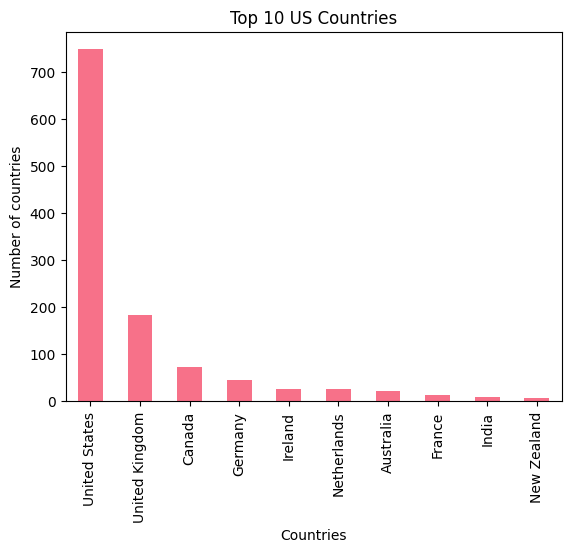

In [26]:
# All Countires
df_global = df.copy()
df_global["Country"] = df.Country.str.replace(r"(^.*United States.*$)", "United States")
df_global.Country.value_counts()[:10].plot(kind="bar")
plt.xlabel("Countries")
plt.ylabel("Number of countries")
plt.title("Top 10 US Countries")
plt.show()

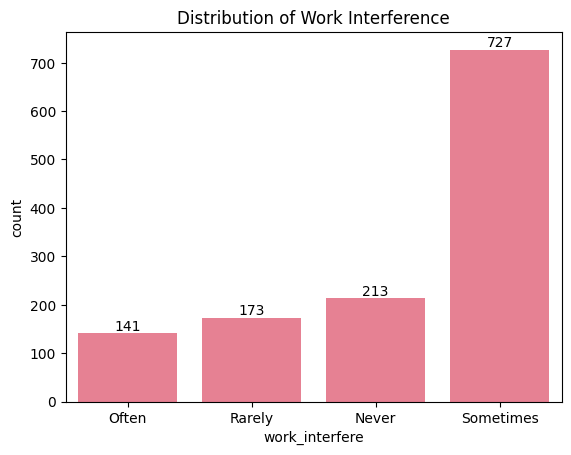

In [27]:
# Plot the distribution of 'work_interfere'

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

In [28]:
# Replace missing data in the 'work_interfere' column with its modal value
df['work_interfere'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['work_interfere'].values.reshape(-1, 1)))

# Replace missing data in the 'self_employed' column with its modal value
df['self_employed'] = np.ravel(SimpleImputer(strategy='most_frequent').fit_transform(df['self_employed'].values.reshape(-1, 1)))

# Display the first few rows of the DataFrame after imputing missing values
df.head()

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States            No             No       Yes   
1   44    Male   United States            No             No        No   
2   32    Male          Canada            No             No        No   
3   31    Male  United Kingdom            No            Yes       Yes   
4   31    Male   United States            No             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often          25-Jun          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely          25-Jun          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

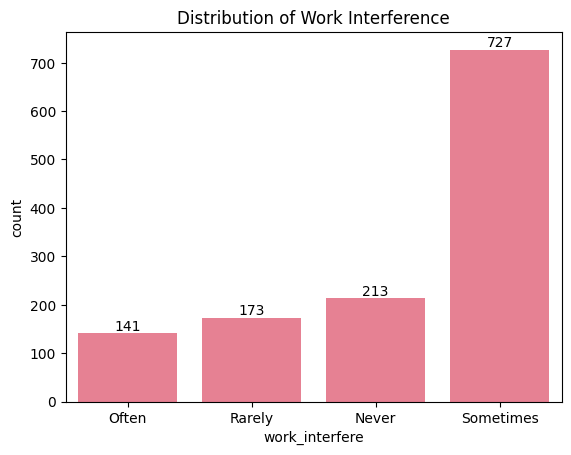

In [29]:
# Confirm there are no more null values in the 'work_interfere' column

# Create a countplot for the 'work_interfere' column
work_interfere_count_plot = sns.countplot(data=df, x='work_interfere')

# Add labels to the bars in the countplot with the count of occurrences
work_interfere_count_plot.bar_label(work_interfere_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Work Interference')

# Show the plot
plt.show()

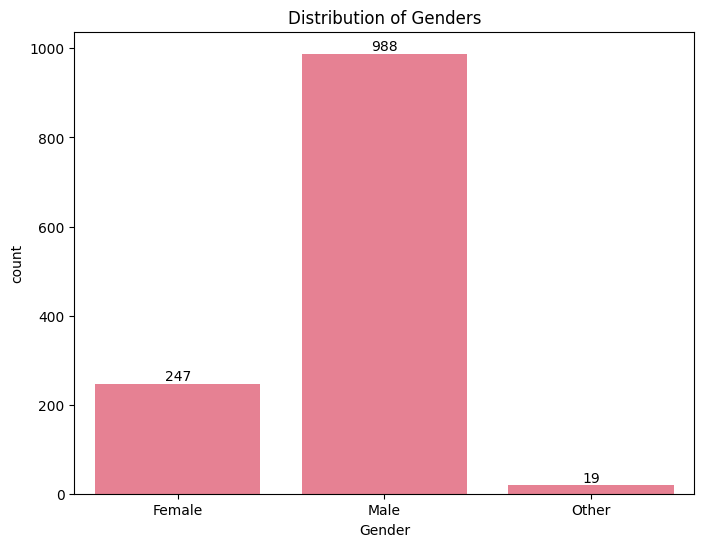

In [30]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Create a countplot for the 'Gender' column after cleaning and new categorization
gender_count_plot = sns.countplot(data=df, x='Gender')

# Add labels to the bars in the countplot with the count of occurrences
gender_count_plot.bar_label(gender_count_plot.containers[0])

# Set the title of the plot
plt.title('Distribution of Genders')

# Show the plot
plt.show()

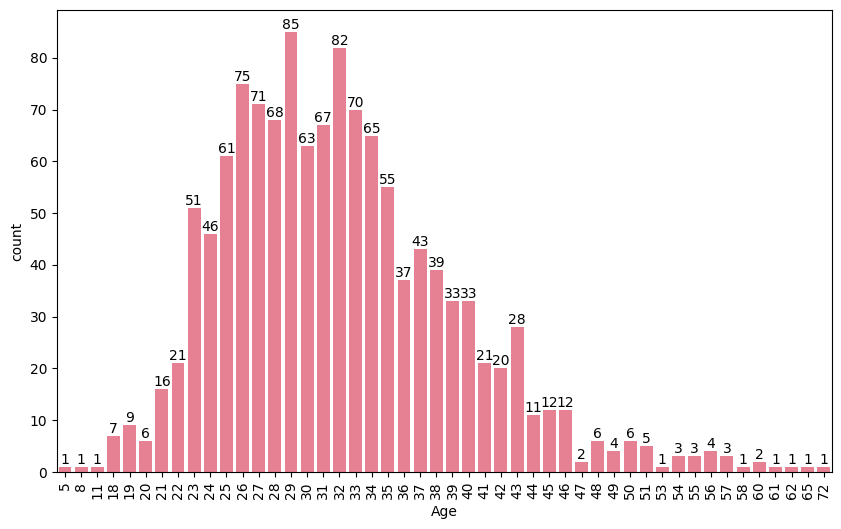

In [31]:
#Visualizing the distribution of Age 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot to visualize the distribution of 'Age'
age_range_plot = sns.countplot(data=df, x='Age')

# Add labels to the bars in the countplot with the count of occurrences
age_range_plot.bar_label(age_range_plot.containers[0])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

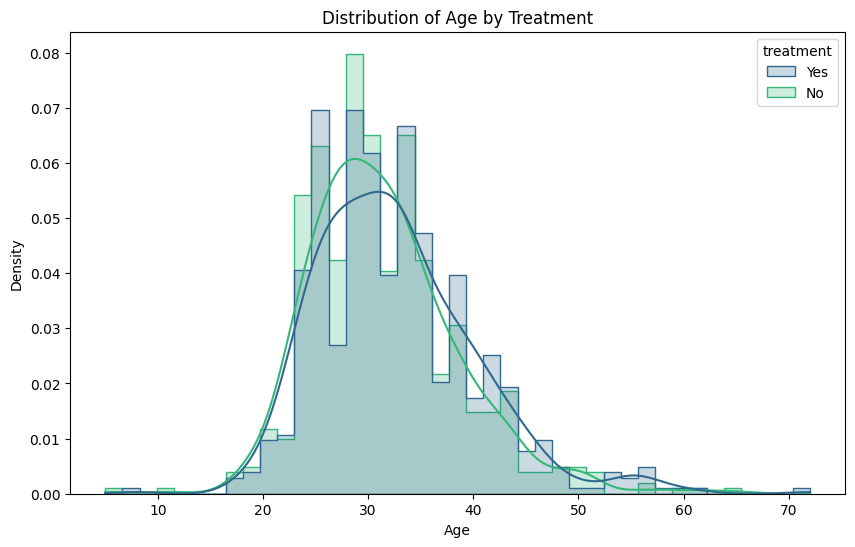

In [32]:
#Plot the Age distribution against Treatment, including the Kernel Density 
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram with kernel density estimate
sns.histplot(data=df, x='Age', hue='treatment', kde=True, element='step', stat='density', common_norm=False, palette='viridis')

# Set the title of the plot
plt.title('Distribution of Age by Treatment')

# Display the plot
plt.show()

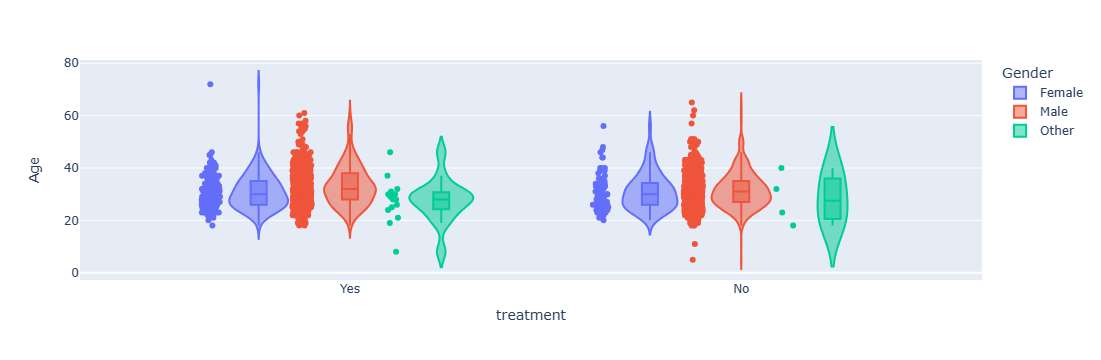

In [33]:
#Treatment analysis from the age-gender point
#Import Plotly.Express
import plotly.express as px

#Setting Values
fig = px.violin(df, y="Age", x="treatment", color="Gender", box=True, points="all")

#Show the Plot
fig.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\542690575.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




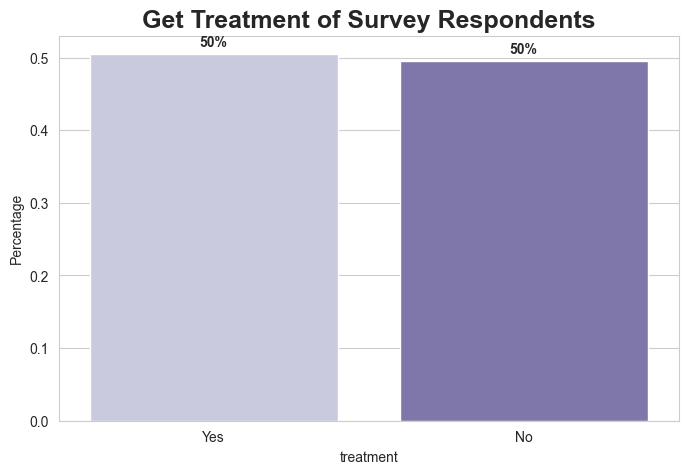

In [34]:
#Plotting whether People sought treatment for a mental health condition?'.

sns.set_style("whitegrid")

#Setting Up Figure
plt.figure(figsize = (8,5))

#Setting Up title
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')

# Calculate the percentage of each treatment category in the 'treatment' column
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

# Create a bar plot using seaborn for the top 10 treatment categories
ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')

# Annotate each bar with the corresponding percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

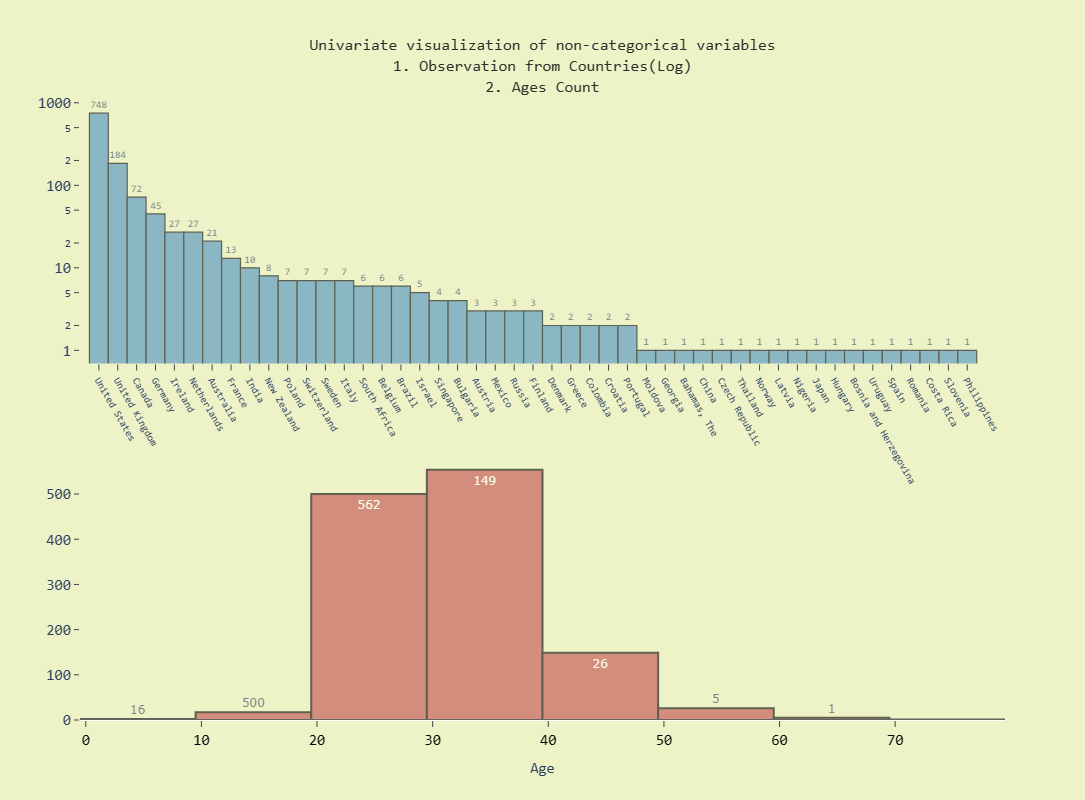

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame and it's already defined with 'Country' and 'Age' columns

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1)

# Add a bar plot to the first subplot with new color "#4a8fc2"
fig.append_trace(go.Bar(
                        y=df['Country'].value_counts(),
                        x=df['Country'].value_counts().index,
                        name='Observations from Countries (Log)',
                        text=df['Country'].value_counts(),
                        textfont=dict(size=10, family='monospace'),
                        textposition='outside',
                        marker=dict(color="#4a8fc2")  # Changed color here
                        ), row=1, col=1)

# Add a histogram to the second subplot with new color "#c24a4a"
fig.append_trace(go.Histogram(
                        x=df['Age'],
                        nbinsx=8,
                        text=['16', '500', '562', '149', '26', '5', '1'],
                        marker=dict(color="#c24a4a")  # Changed color here
                        ), row=2, col=1)

# Update layout and settings for the first subplot
fig.update_xaxes(
        row=1, col=1,
        tickfont=dict(size=10, family='monospace'),
        tickmode='array',
        ticktext=df['Country'].value_counts().index,
        tickangle=60,
        ticklen=6,
        showline=False,
        showgrid=False,
        ticks='outside')

fig.update_yaxes(type='log',
        row=1, col=1,
        tickfont=dict(size=15, family='monospace'),
        tickmode='array',
        showline=False,
        showgrid=False,
        ticks='outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width=1.2,
                  opacity=0.6,
                  row=1, col=1)

# Update layout and settings for the second subplot
fig.update_xaxes(range=[-1, 48], row=1, col=1)
fig.update_xaxes(
        title=dict(text='Age',
                   font=dict(size=15,
                             family='monospace')),
        row=2, col=1,
        tickfont=dict(size=15, family='monospace', color='black'),
        tickmode='array',
        ticktext=['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
        ticklen=6,
        showline=False,
        showgrid=False,
        ticks='outside')

fig.update_yaxes(
        row=2, col=1,
        tickfont=dict(size=15, family='monospace'),
        tickmode='array',
        showline=False,
        showgrid=False,
        ticks='outside')

fig.update_traces(
                  marker_line_color='black',
                  marker_line_width=2,
                  opacity=0.6,
                  row=2, col=1)

# Update overall layout settings
fig.update_layout(height=800, width=900,
                  title=dict(text='Univariate visualization of non-categorical variables<br>1. Observation from Countries(Log)<br>2. Ages Count',
                              x=0.5,
                              font=dict(size=16, color='#27302a',
                                        family='monospace')),
                  plot_bgcolor='#edf2c7',
                  paper_bgcolor='#edf2c7',
                  showlegend=False)

# Display the plot
fig.show()


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\3059148269.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\3059148269.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




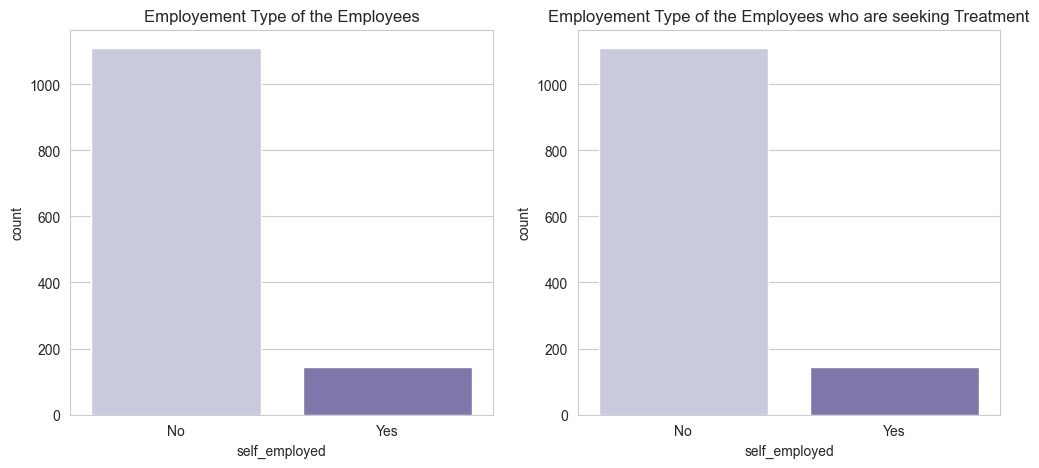

In [37]:
#Visualizing Employment type of Employees Seeking treatment

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot countplot for 'self_employed'
sns.countplot(x='self_employed', data=df, palette='Purples', ax=axes[0])
axes[0].set_title('Employement Type of the Employees')

# Plot countplot for 'treatment'
sns.countplot(x='self_employed', data=df, palette='Purples', ax=axes[1])
axes[1].set_title('Employement Type of the Employees who are seeking Treatment')

plt.show()

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\3321747945.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


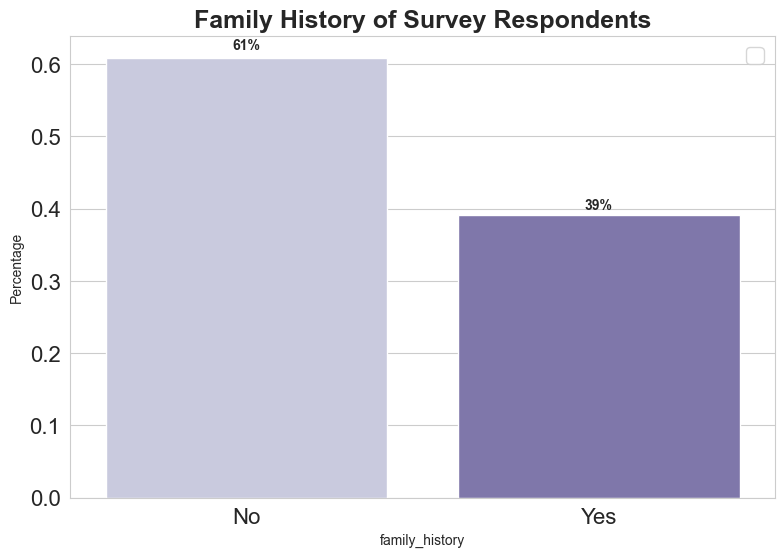

In [38]:
#Family History of Mental Illness of Survey Takers

plt.figure(figsize=(20, 6))

# Subplot 1: Barplot
plt.subplot(1, 2, 1)
eda_percentage = df['family_history'].value_counts(normalize=True).rename_axis('family_history').reset_index(name='Percentage')
ax = sns.barplot(x='family_history', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()


C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\1165026606.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


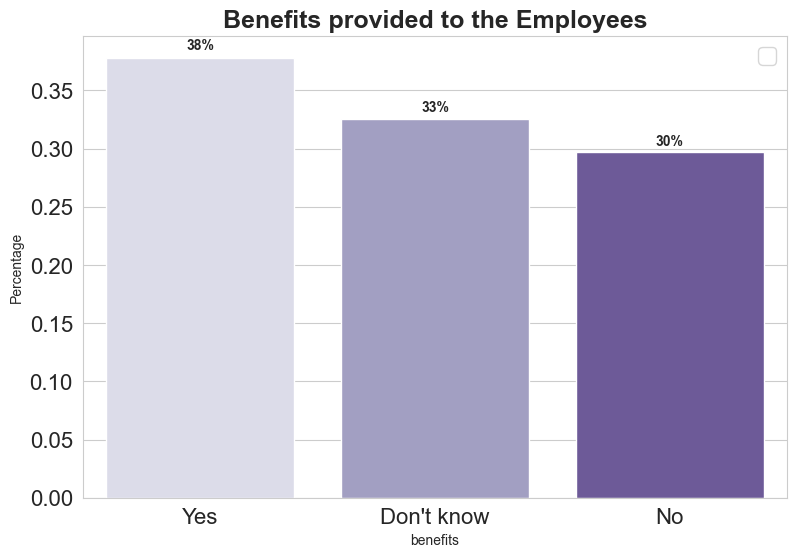

In [39]:


plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)



C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\1256953726.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




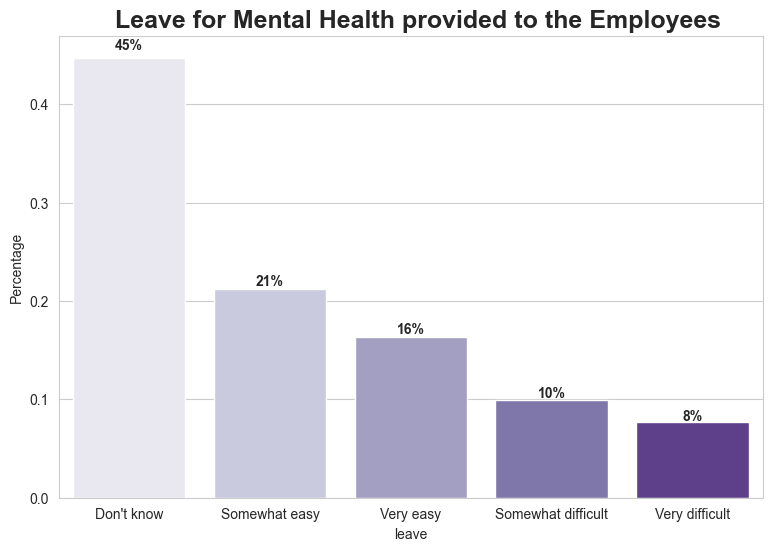

In [40]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\2456327532.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Mental or Physical Health')

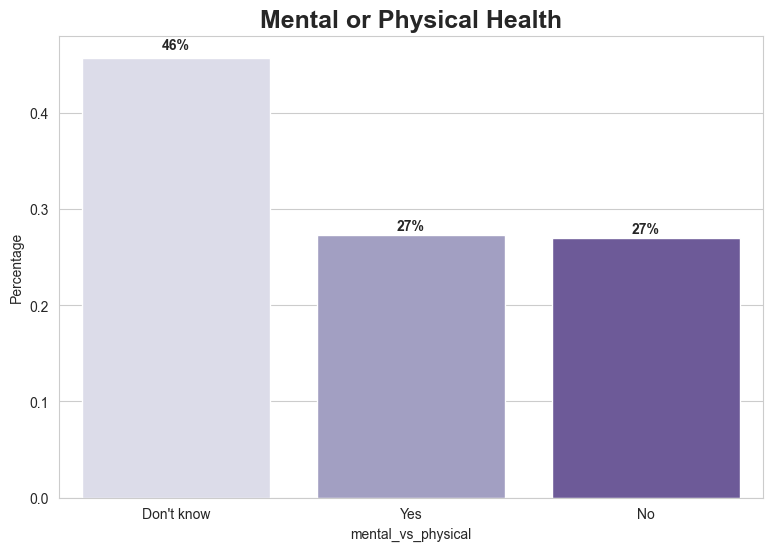

In [41]:
#Do you feel that your employer takes mental health as seriously as physical health?

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')

C:\Users\Aleena Omair\AppData\Local\Temp\ipykernel_6092\2456327532.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Mental or Physical Health')

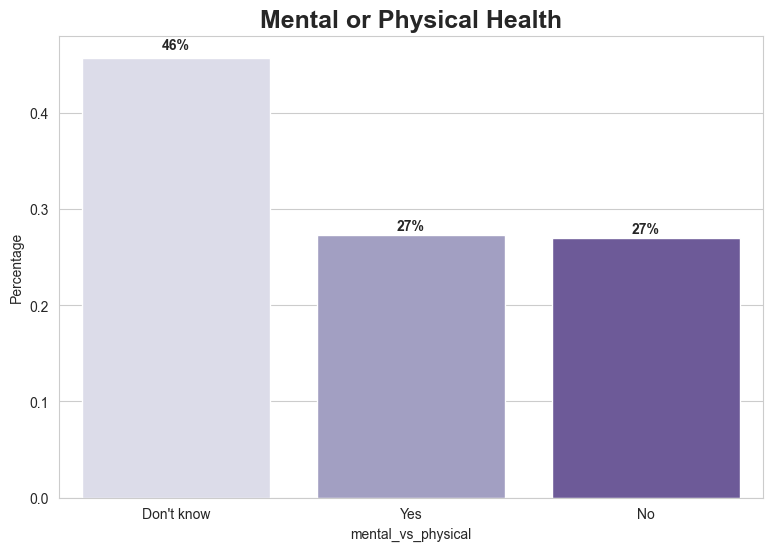

In [42]:
#Do you feel that your employer takes mental health as seriously as physical health?

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')

In [43]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
import pandas as pd

# Assuming df is your DataFrame from another project
# Displaying all columns of the DataFrame
pd.set_option('display.max_columns', None)
df.head(1000)


Age  Gender         Country self_employed family_history treatment  \
0      37  Female   United States            No             No       Yes   
1      44    Male   United States            No             No        No   
2      32    Male          Canada            No             No        No   
3      31    Male  United Kingdom            No            Yes       Yes   
4      31    Male   United States            No             No        No   
...   ...     ...             ...           ...            ...       ...   
999    27    Male          Sweden            No             No        No   
1000   25    Male   United States            No            Yes       Yes   
1001   42    Male   United States            No            Yes       Yes   
1002   34    Male   United States            No            Yes       Yes   
1003   26  Female   United States            No             No       Yes   

     work_interfere    no_employees remote_work tech_company    benefits  \
0             Often          25-Jun          No          Yes         Yes   
1            Rarely  More than 1000          No           No  Don't know   
2            Rarely          25-Jun          No          Yes          No   
3             Often          26-100          No          Yes          No   
4             Never         100-500         Yes          Yes         Yes   
...             ...             ...         ...          ...         ...   
999       Sometimes          25-Jun          No          Yes          No   
1000          Often          25-Jun         Yes          Yes         Yes   
1001      Sometimes          25-Jun         Yes          Yes  Don't know   
1002          Often         100-500          No          Yes         Yes   
1003      Sometimes          26-100         Yes          Yes  Don't know   

     care_options wellness_program   seek_help   anonymity  \
0        Not sure               No         Yes         Yes   
1              No       Don't know  Don't know  Don't know   
2              No               No          No  Don't know   
3             Yes               No          No          No   
4              No       Don't know  Don't know  Don't know   
...           ...              ...         ...         ...   
999            No               No          No  Don't know   
1000          Yes               No  Don't know         Yes   
1001           No               No  Don't know  Don't know   
1002          Yes               No          No         Yes   
1003           No               No  Don't know  Don't know   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
999           Don't know                        No                      No   
1000       Somewhat easy                        No                      No   
1001          Don't know                     Maybe                      No   
1002           Very easy                        No                      No   
1003          Don't know                     Maybe                      No   

         coworkers supervisor mental_health_interview phys_health_interview  \
0     Some of them        Yes                      No                 Maybe   
1               No         No                      No                    No   
2              Yes        Yes                     Yes                   Yes   
3     Some of them         No                   Maybe                 Maybe   
4     Some of them        Yes                     Yes                   Yes   
...            ...      

# Step 05. Data Preparation and Feature Selection

In [45]:
#Encode the dataset to make it viable for analysis
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Define the columns to encode
columns_to_encode = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                     'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                     'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                     'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                     'mental_vs_physical', 'obs_consequence']

# Create a new DataFrame 'df_encode' and encode categorical columns using LabelEncoder in a loop
df_encode = df.copy()  # Create a copy of the original DataFrame
for column in columns_to_encode:
    df_encode[column] = le.fit_transform(df_encode[column])

# Display information about the new encoded DataFrame
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1254 non-null   int64
 1   Gender                     1254 non-null   int32
 2   Country                    1254 non-null   int32
 3   self_employed              1254 non-null   int32
 4   family_history             1254 non-null   int32
 5   treatment                  1254 non-null   int32
 6   work_interfere             1254 non-null   int32
 7   no_employees               1254 non-null   int32
 8   remote_work                1254 non-null   int32
 9   tech_company               1254 non-null   int32
 10  benefits                   1254 non-null   int32
 11  care_options               1254 non-null   int32
 12  wellness_program           1254 non-null   int32
 13  seek_help                  1254 non-null   int32
 14  anonymity                  12

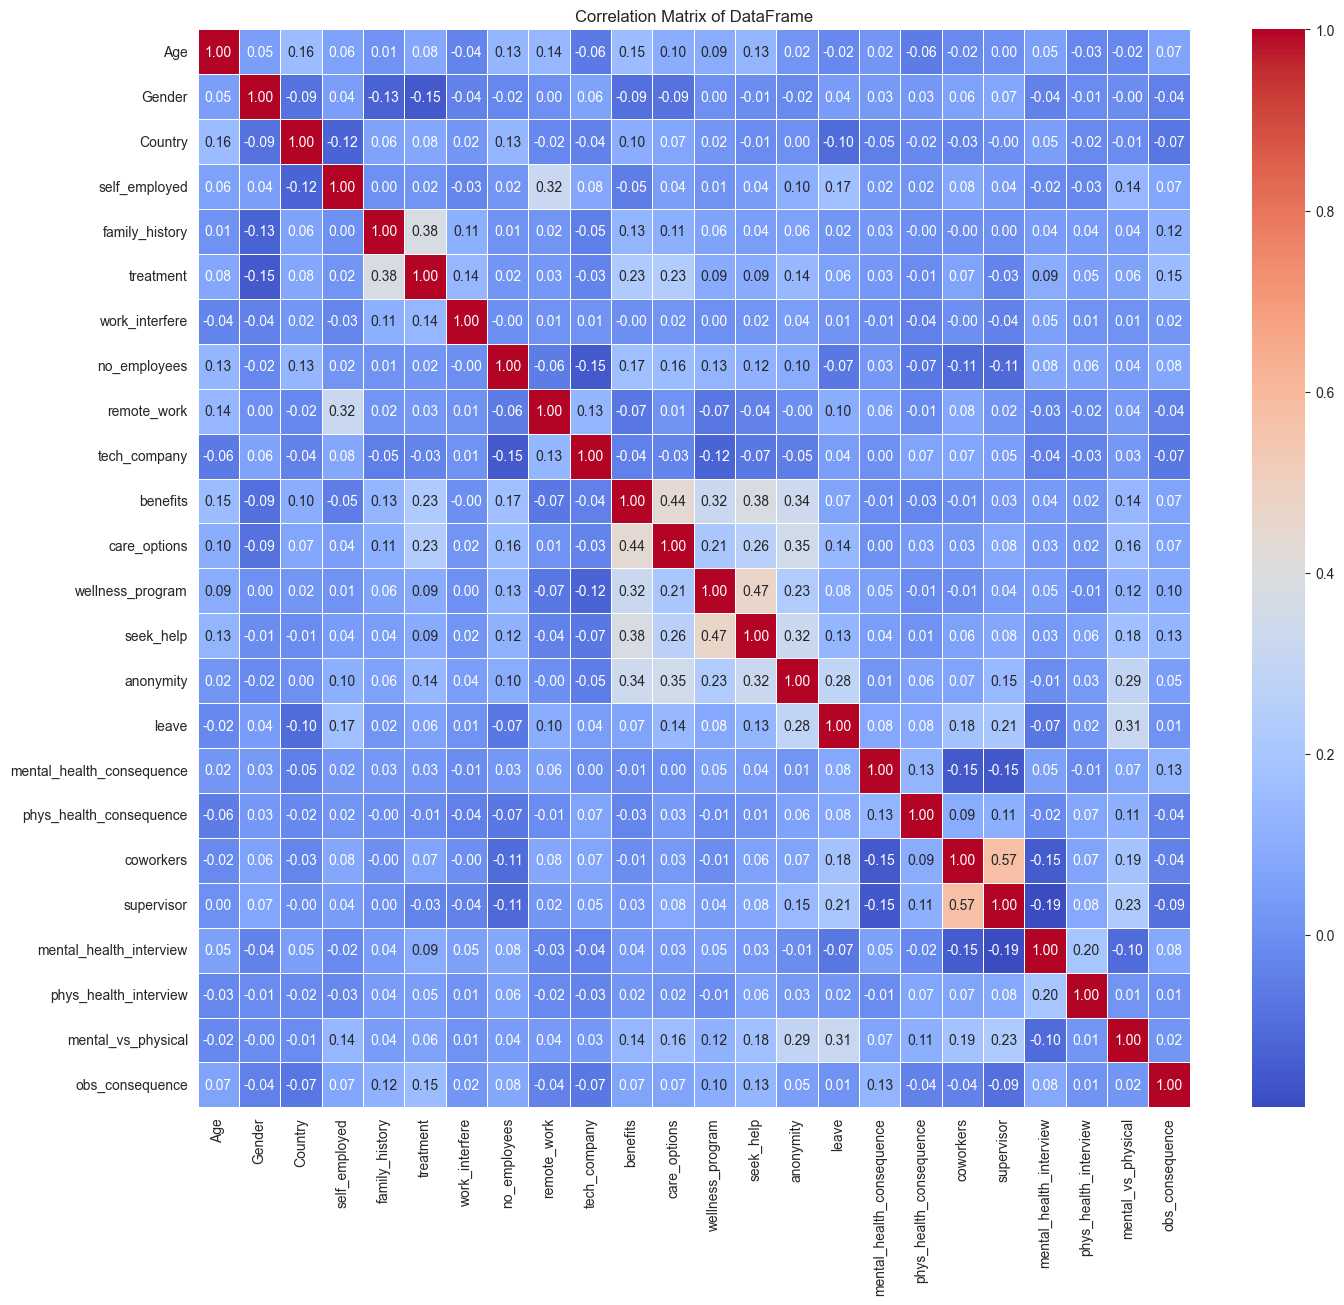

In [46]:
# Create a correlation matrix for the encoded DataFrame
correlation_matrix = df_encode.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title of the plot
plt.title('Correlation Matrix of DataFrame')

# Show the plot
plt.show()

In [47]:
# Create a list of independent variables and the dependent variable
independent_variables = ['Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity', 'mental_health_interview']
dependent_variable = 'treatment'

# Extract the relevant columns for correlation analysis
data_for_correlation = df_encode[[dependent_variable] + independent_variables].dropna()

# Perform Pearson correlation test for each independent variable
correlation_results = {}
for independent_variable in independent_variables:
    # Calculate correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(data_for_correlation[independent_variable], data_for_correlation[dependent_variable])
    
    # Store results in a dictionary
    correlation_results[independent_variable] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

# Display the correlation results with column names
for variable, result in correlation_results.items():
    print(f"{variable} - Correlation with {dependent_variable}: {result['correlation_coefficient']:.4f}, p-value: {result['p_value']:.4f}")

Gender - Correlation with treatment: -0.1504, p-value: 0.0000
family_history - Correlation with treatment: 0.3781, p-value: 0.0000
work_interfere - Correlation with treatment: 0.1373, p-value: 0.0000
benefits - Correlation with treatment: 0.2262, p-value: 0.0000
care_options - Correlation with treatment: 0.2348, p-value: 0.0000
anonymity - Correlation with treatment: 0.1425, p-value: 0.0000
mental_health_interview - Correlation with treatment: 0.0947, p-value: 0.0008


# Step 06. Machine Learning Modeling

# Logistic Regression

Accuracy: 0.71
Confusion Matrix:
[[92 25]
 [48 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       117
           1       0.77      0.64      0.70       134

    accuracy                           0.71       251
   macro avg       0.72      0.71      0.71       251
weighted avg       0.72      0.71      0.71       251



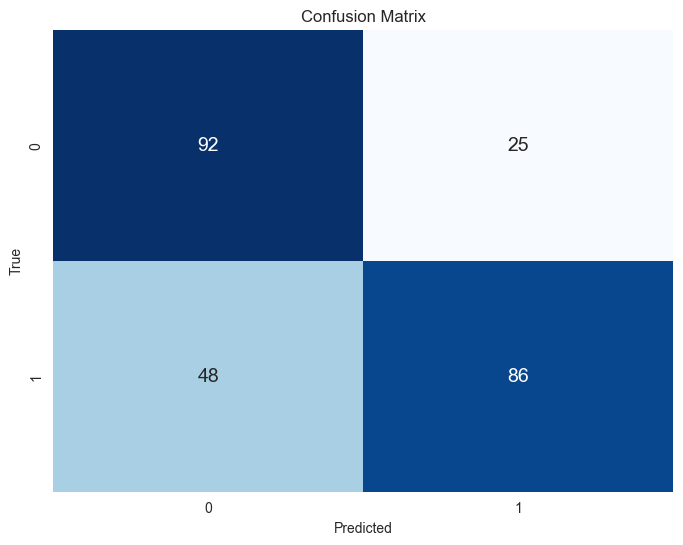

In [48]:
#Data Preprocessing
X = df_encode[independent_variables]  # Features
y = df_encode['treatment']  # Target variable

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

#Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Gradient Boosting Classifier

Text(50.722222222222214, 0.5, 'Actual')

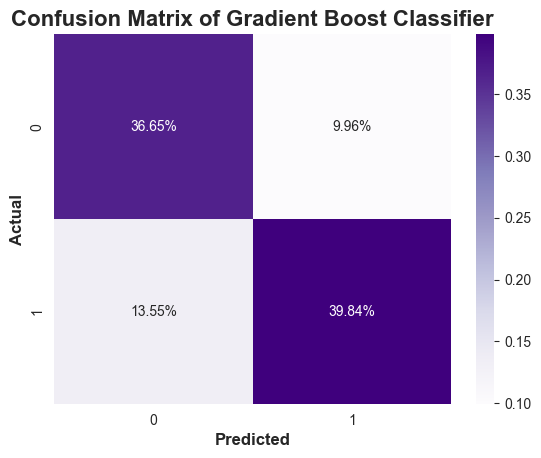

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

# Random Forest

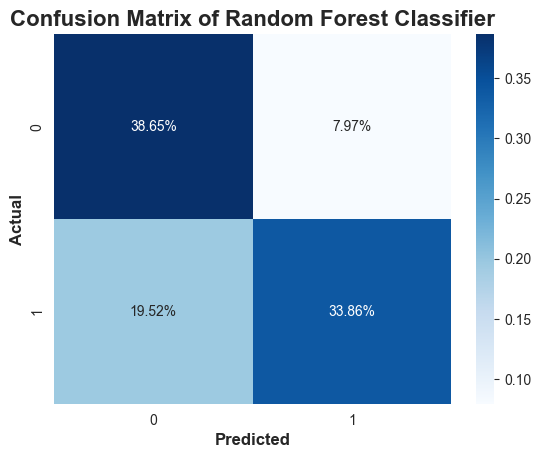

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Create and Train Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make Predictions
pred_rf = rfc.predict(X_test)

# Calculate Confusion Matrix
cf_matrix_rf = confusion_matrix(y_test, pred_rf)

# Visualize Confusion Matrix for Random Forest
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()


# Support Vector Machine with Liner Kernel

Accuracy: 0.69
Confusion Matrix:
[[97 20]
 [59 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       117
           1       0.79      0.56      0.66       134

    accuracy                           0.69       251
   macro avg       0.71      0.69      0.68       251
weighted avg       0.71      0.69      0.68       251



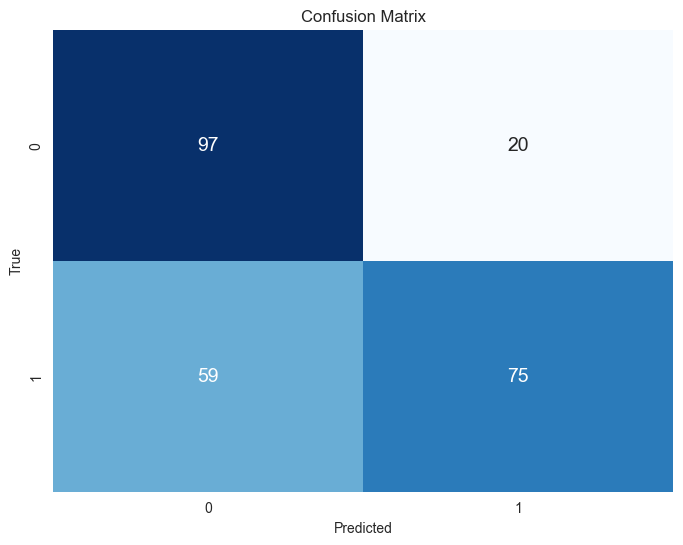

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Import Support Vector Machine Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your DataFrame is named 'df_encode' and you have defined 'independent_variables' and 'target_variable'

# Data Preprocessing
#X = df_encode[independent_variables]  # Features
#y = df_encode[target_variable]  # Target variable

# Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training (Support Vector Machine)
model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Support Vector Machine with rbf Kernel

Accuracy: 0.75
Confusion Matrix:
[[94 23]
 [39 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       117
           1       0.81      0.71      0.75       134

    accuracy                           0.75       251
   macro avg       0.76      0.76      0.75       251
weighted avg       0.76      0.75      0.75       251



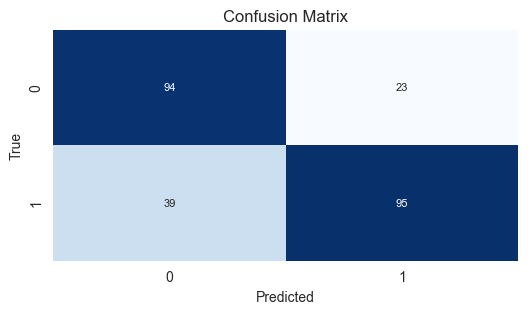

In [53]:
model = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 8})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Support Vector Machine with poly Kernel

Accuracy: 0.75
Confusion Matrix:
[[96 21]
 [42 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       117
           1       0.81      0.69      0.74       134

    accuracy                           0.75       251
   macro avg       0.75      0.75      0.75       251
weighted avg       0.76      0.75      0.75       251



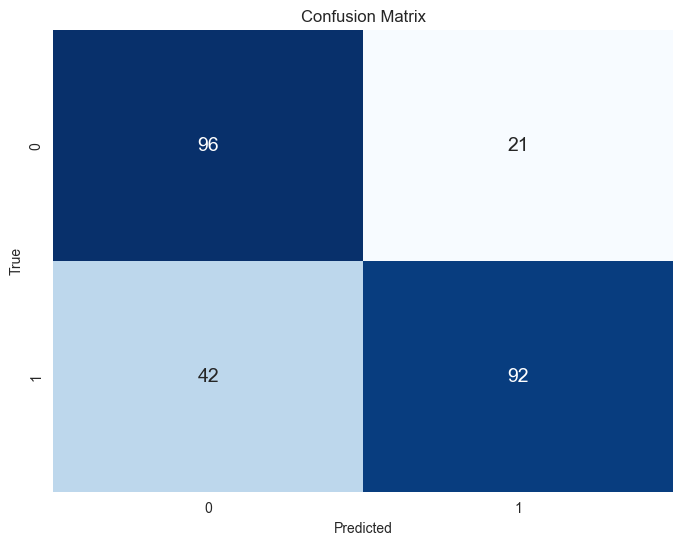

In [54]:
model = SVC(kernel='poly')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K Nearest Neighbors Classifier

Accuracy: 0.67
Confusion Matrix:
[[88 29]
 [53 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       117
           1       0.74      0.60      0.66       134

    accuracy                           0.67       251
   macro avg       0.68      0.68      0.67       251
weighted avg       0.68      0.67      0.67       251



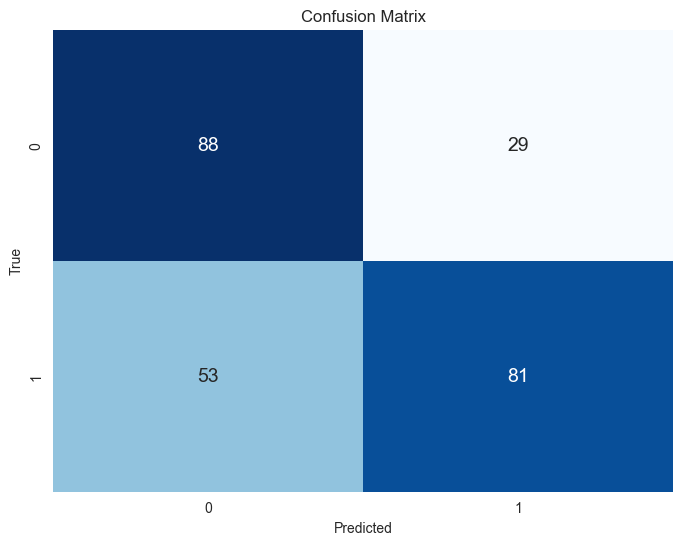

In [55]:
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = KNeighborsClassifier(n_neighbors=7)  # You can choose the number of neighbors (k)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()